In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
pip install numpy

In [3]:
pip install pandas

In [4]:
pip install matplotlib

In [5]:
pip install seaborn

In [6]:
pip install scikit-learn

In [7]:
pip install scikit-learn


In [8]:
pip install tensorflow

In [9]:
pip install tensorflow

In [10]:
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)


In [12]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [13]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

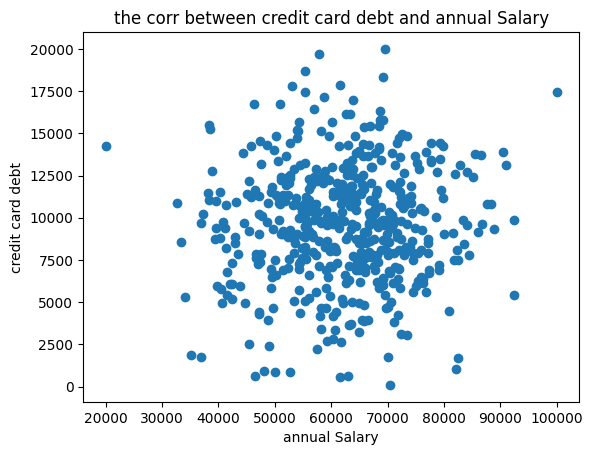

In [14]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the corr between credit card debt and annual Salary')

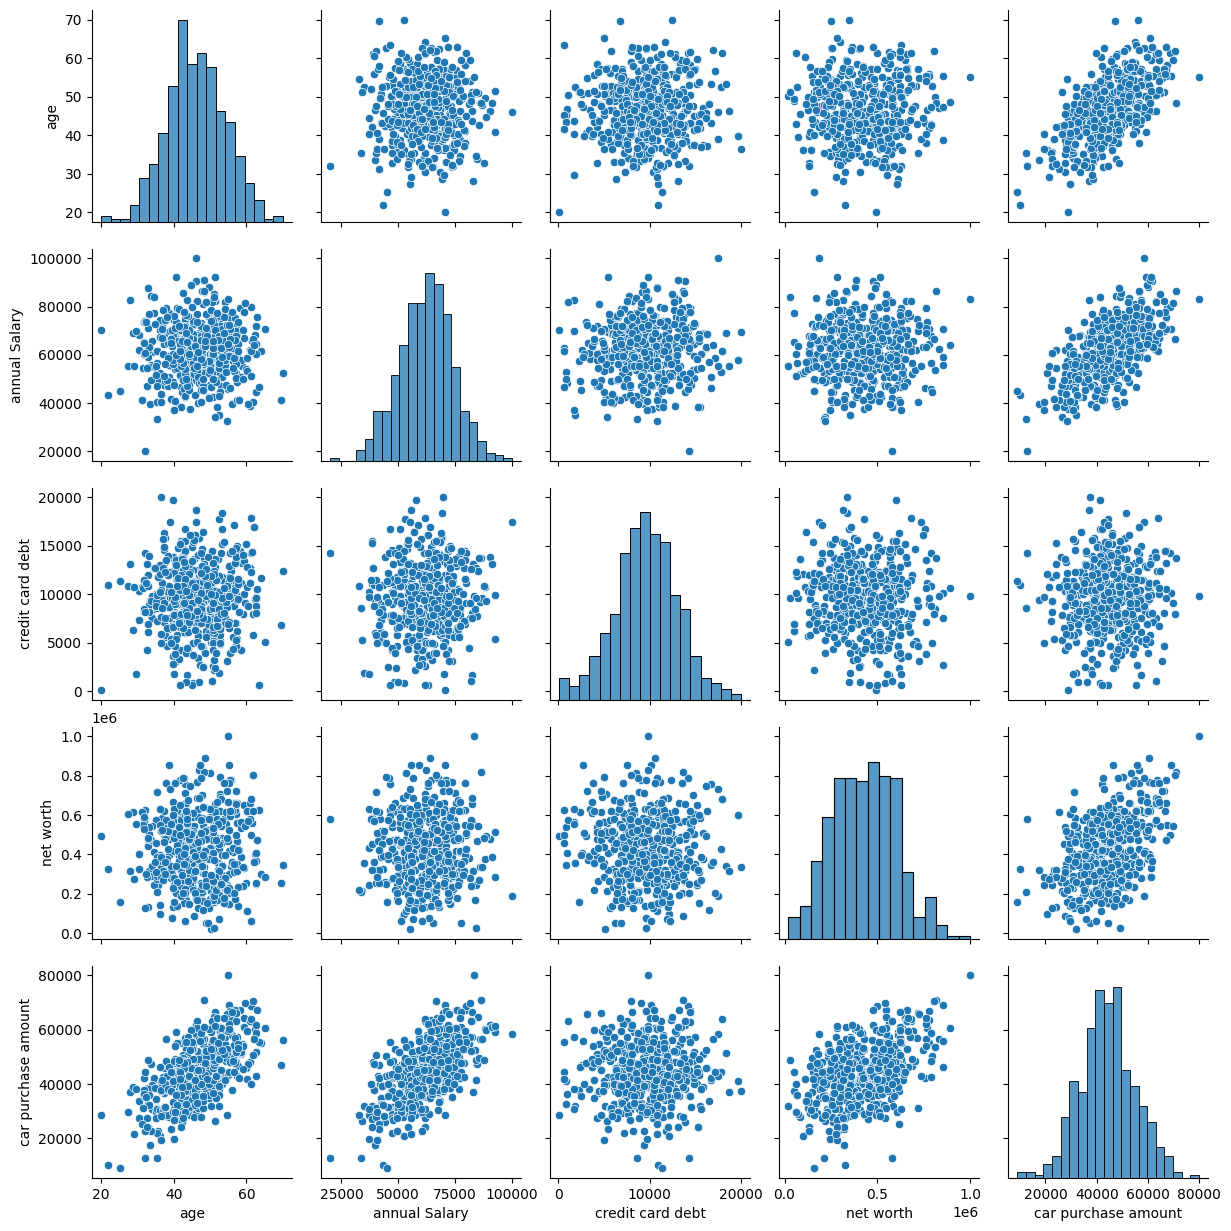

In [15]:
sns.pairplot(df)

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [18]:
#Trying linear regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999818265987
Test score 0.9999999787800626


In [19]:
y_pred = lreg.predict(X_test)

In [20]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 3s 49ms/step - loss: 0.3059 - mean_absolute_error: 0.5314 - val_loss: 0.2360 - val_mean_absolute_error: 0.4705
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.2121 - mean_absolute_error: 0.4385 - val_loss: 0.1578 - val_mean_absolute_error: 0.3806
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1421 - mean_absolute_error: 0.3528 - val_loss: 0.1007 - val_mean_absolute_error: 0.2988
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0907 - mean_absolute_error: 0.2739 - val_loss: 0.0609 - val_mean_absolute_error: 0.2255
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0548 - mean_absolute_error: 0.2051 - val_loss: 0.0351 - val_mean_absolute_error: 0.1637
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0324 - mean_absolute_error: 0.1503 - val_loss: 0.0197 - val_mean_absolute_error: 0.1174
Epoch 7/50
10/10 [=====

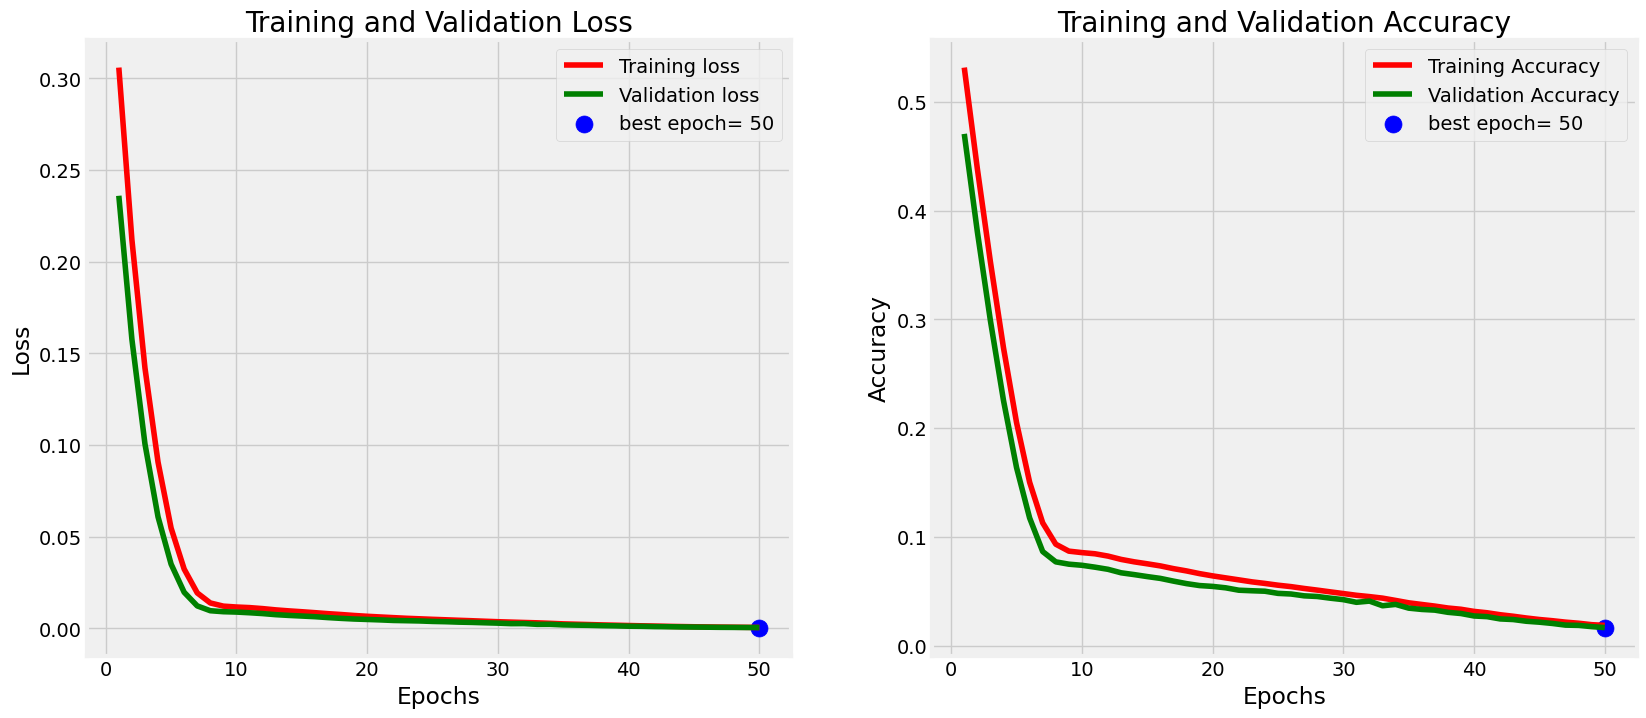

In [21]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [22]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [23]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999787800626


In [24]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 5.6720e-04 - mean_absolute_error: 0.0181


[0.0005672029801644385, 0.018089544028043747]

In [25]:
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 85ms/step


array([[164997.31]], dtype=float32)

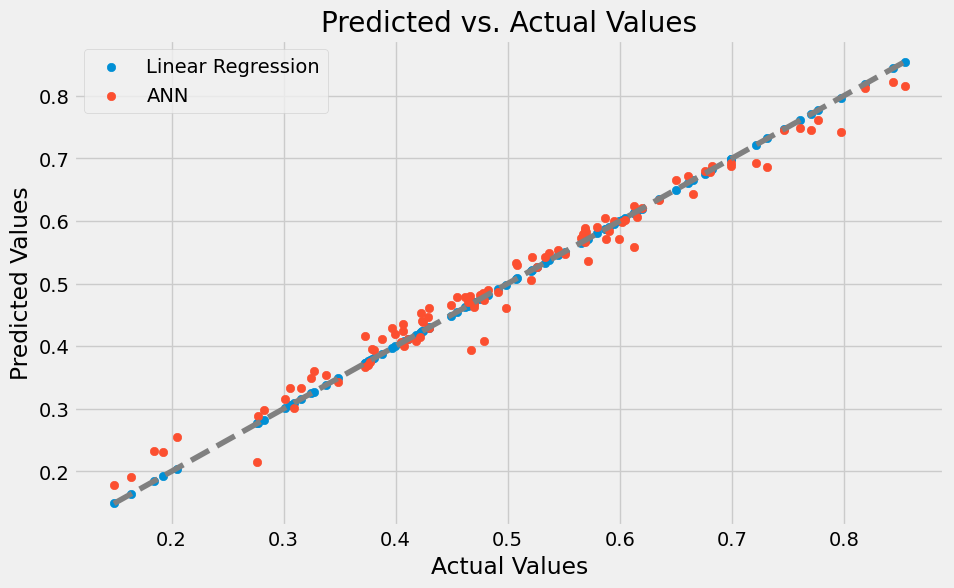

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [27]:
y_test_binary = (y_test >= 0.5).astype(int)

In [28]:
# Predicting the test set results
y_pred_binary = lreg.predict(X_test)
y_pred_binary = (y_pred_binary > 0.5).astype(int)  # Mengonversi prediksi ke biner

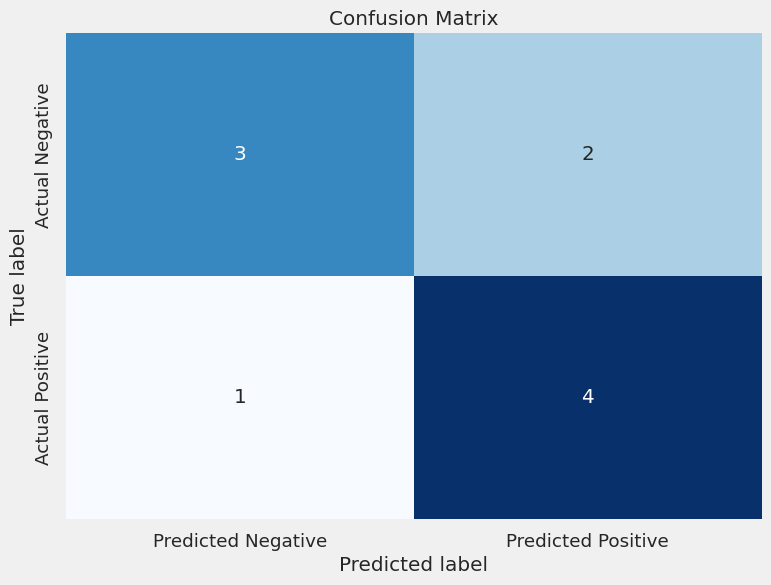

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate example data
y_test_binary = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred_binary = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Generate example data
y_test_binary = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred_binary = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

# Generate classification report
report = classification_report(y_test_binary, y_pred_binary)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

